In [6]:
%run ./LLE.py

In [78]:
data_og = np.load('u_original_5.1_10000.npy', allow_pickle=True)[:,-1]

In [100]:
x = data_og[15000:16000]
m=2
tao=150
meanperiod=5
maxiter=10

In [101]:
nn = len(x)
mm = nn-(m-1)*tao

yy = psr_embedded_dim(x,m+1,tao,mm)

neardis = np.zeros(mm)
nearpos = np.zeros(mm)
dd = np.zeros(maxiter)

for i in range(mm):
    x0 = np.ones([mm,1])*yy[i,:]
    distance = sqrt(sum(pow((yy-x0),2),axis=1))
    for j in range(mm):
        if(np.abs(j-i)<=meanperiod):
            distance[j]=1e10 # far away...
    neardis[i] = min(distance)
    nearpos[i] = int(np.where(distance == min(distance))[0][0])


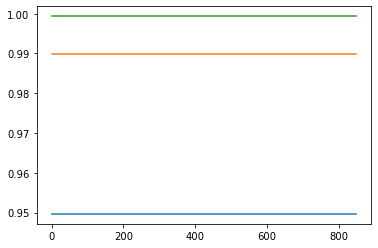

In [105]:
plt.plot(x0)

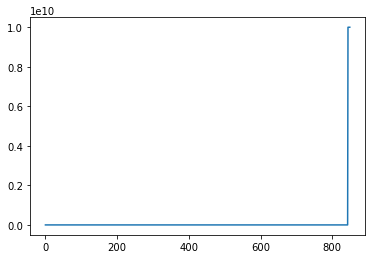

In [103]:
plt.plot(distance)

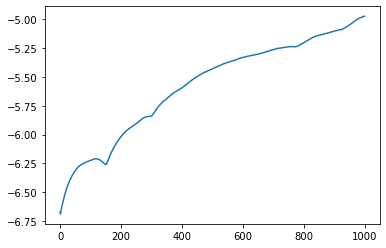

In [90]:
for k in range(maxiter):
    maxind=mm-k
    evolve=0
    pnt=0
    for j in range(mm):
        if (j<maxind and nearpos[j]<= maxind):
            dist_k = np.sqrt(np.sum(np.power(yy[j+k-1,:]-yy[int(nearpos[j])+k-1,:],2)))  
            if(dist_k != 0.0):
                evolve = evolve+log(dist_k)
                pnt += 1
    if pnt > 0:
        dd[k] = evolve/float(pnt)
    else:
        dd[k] = 0


tlinear = np.linspace(800,len(dd)-1,len(dd)) 
ff = np.polyfit(tlinear,dd,1)
polynomial = np.poly1d(ff)
ys = polynomial(tlinear)
#plot(tlinear,ys,'g-')
#plot(tlinear,dd)
#xlabel('time', fontsize=20)
#ylabel('<ln(divergence)>', fontsize=20)
#show()
lle = ff[0]

In [62]:
def psr_embedded_dim(x,m,tao,npoint):
    ''' phase space reconstruction 
    x: time series
    m: embedding dimension
    tao: time delay
    npoint: total number of points
    return y: M x mm matrix
    '''
    n = len(x)
    mm = npoint #or m=n-(m-1)*tao
    
    y = np.zeros([mm,m])

    for i in range(m):
        idx = np.linspace(0,mm-1,mm)
        tmp_idx = idx+((i-1)*tao)
        b = tmp_idx.astype(int)
        y[:,i] = x[b].T

    return y

In [65]:
y=psr_embedded_dim(data_og,3,82,1000)